# What
mfa is a simple tool that helps to securily keep mfa seeds in the native apple keychain. it creates a separated keychain only for this, which is protected by password. it will allow you to manage many seeds, securely and conviniently. it will also allow you to search among many possible mfa entries. they can be added, queried and removed with as few keystrokes as possible!

# Install

Note: the shell commands are shown with a bang in the beginning.

If you are not familiar with Jupyter notebooks, then copy the command without the bang before you run them in your terminal.

If you are using jupyter to run this guide you only have to press Shift + Enter to run each command.

Installs the oathtool which translates MFA keys into the numbers for us.

In [2]:
!brew install oathtool

==> Searching for similarly named formulae and casks...
==> Formulae
oath-toolkit ✔                           atdtool

To install oath-toolkit ✔, run:
  brew install oath-toolkit ✔


installs the ix-cli tool that allows to send stuff to you clipboard without newlines

In [3]:
!gem install ix-cli

Fetching ix-cli-0.0.16.gem
Parsing documentation for ix-cli-0.0.16
Installing ri documentation for ix-cli-0.0.16
Done installing documentation for ix-cli after 0 seconds
1 gem installed


install the ona gem that allows us to create friendly and powerful command line tools

In [5]:
!gem install ona

Parsing documentation for ona-1.0.0
Done installing documentation for ona after 0 seconds
1 gem installed


create an executable file that will call our mfa util

in my computer the mfa code lives in `~/dev/git/mfa/`

and my executable file lives in `~/dev/bin/mfa`

Below I will show how the executable looks like.

In [6]:
 cat `which mfa`

#!/usr/bin/env bash

cd ~/dev/git/mfa/ && ona $@


Is up to you to decide:

1. where in your system you want it to live
1. and to add it to your $PATH
1. make it an actual executable file

# Usage

If you want to know what options there are ask for help!

In [7]:
!mfa help

[mfa] create-keychain     Create the MFA Keychain.
[mfa] delete-keychain     Delete the MFA Keychain.
[mfa] dump [NUMBER]       Dump seed, service, and code to STDOUT.
[mfa] get [NUMBER]        Get mfa from keychain and send to clipboard.
[mfa] ls                  List all MFAs.
[mfa] rm [NUMBER]         Remove an existing mfa seed.
[mfa] s [STRING]          Search by service.
[mfa] set [SERVICE] [MFA] Add a new MFA entry.
[any] help                Print help.
[any] quit                Exit this program.


If its the first time you are running this program then you must create a keychain.

the mfa program will use the defacto native keychain mechanism from mac.

but it will never attempt to read any existing keychain, instead it will create a brand new one.

where you can keep your mfas

you only have to create a keychain the first time you run the program.

since this requires you type a password (that will only be used to protect this new keychain that will be created)

I would recommend to run this command on your terminal.

The command:

`mfa create-keychain`

Example:

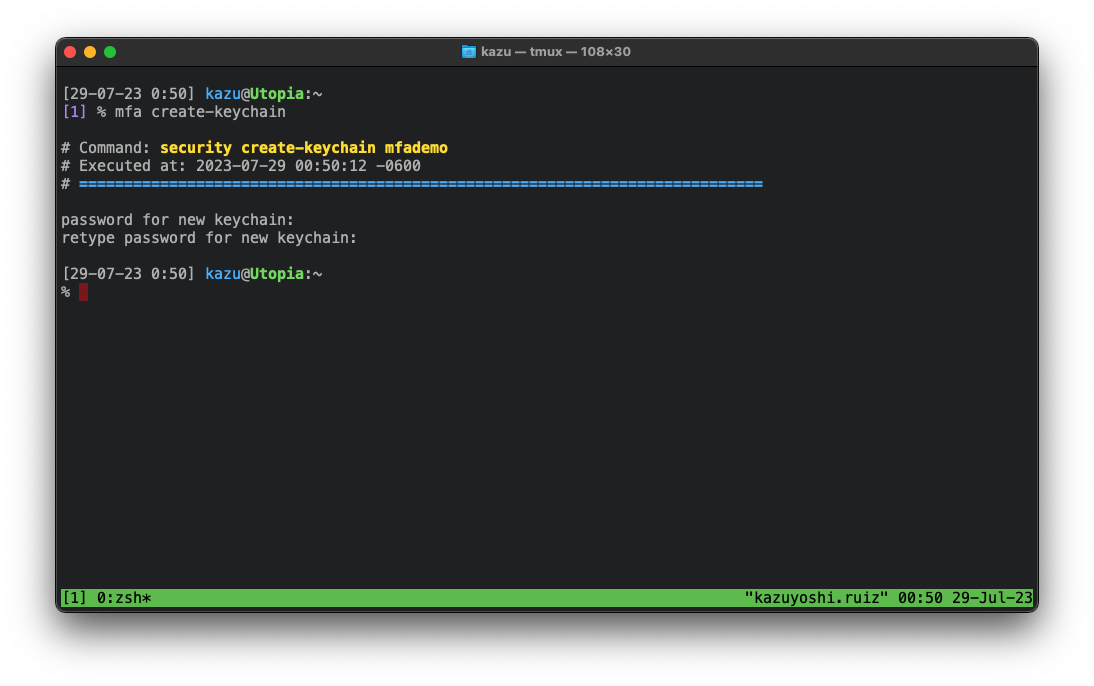

Great let's add our first MFA seed!

In [13]:
!mfa set gmail GEZDGNBVGY3TQOJQGEZDGNBVGY3TQOJQ


# Command: security add-generic-password -a mfademo -s gmail -w GEZDGNBVGY3TQOJQGEZDGNBVGY3TQOJQ mfademo
# Executed at: 2023-07-29 01:04:56 -0600
# ============================================================================



Let's refresh our memory and ask for help!

In [11]:
!mfa help

[mfa] create-keychain     Create the MFA Keychain.
[mfa] delete-keychain     Delete the MFA Keychain.
[mfa] dump [NUMBER]       Dump seed, service, and code to STDOUT.
[mfa] get [NUMBER]        Get mfa from keychain and send to clipboard.
[mfa] ls                  List all MFAs.
[mfa] rm [NUMBER]         Remove an existing mfa seed.
[mfa] s [STRING]          Search by service.
[mfa] set [SERVICE] [MFA] Add a new MFA entry.
[any] help                Print help.
[any] quit                Exit this program.


Now let's list our MFAs

Any MFA added to the keychain will be assigned a number.

This is so we can execute actions on certain items by typing the bare minimum.

In [10]:
!mfa ls

    0 - service : gmail


Great, now let's get our MFA

Please note: A dialog box will open asking for the password of they keychain we created.

This is because before we can read what is in the keychain we need to pass on the password we chose when creating they keychain.

All of this is natively managed by the mac keychain system.

In [14]:
!mfa get 0

    0 - service : gmail
      * Sent to clipboard!
      > 822916


Your MFA is printed on the screen and also sent to your clipboard.

Please note: At this point you might repeat the command and you'll get a new code if enough time has passed.

After a couple of minutes the keychain might ask you for the password again.

All this behaviour is to protect the data that is in the keychain.

and is entirely managed by the mac keychain system.

# Extra

If you like the STDIN form

In [15]:
!echo get 0 | mfa

Mfa> get 0
    0 - service : gmail
      * Sent to clipboard!
      > 474755
Mfa> 


Using the tool shell

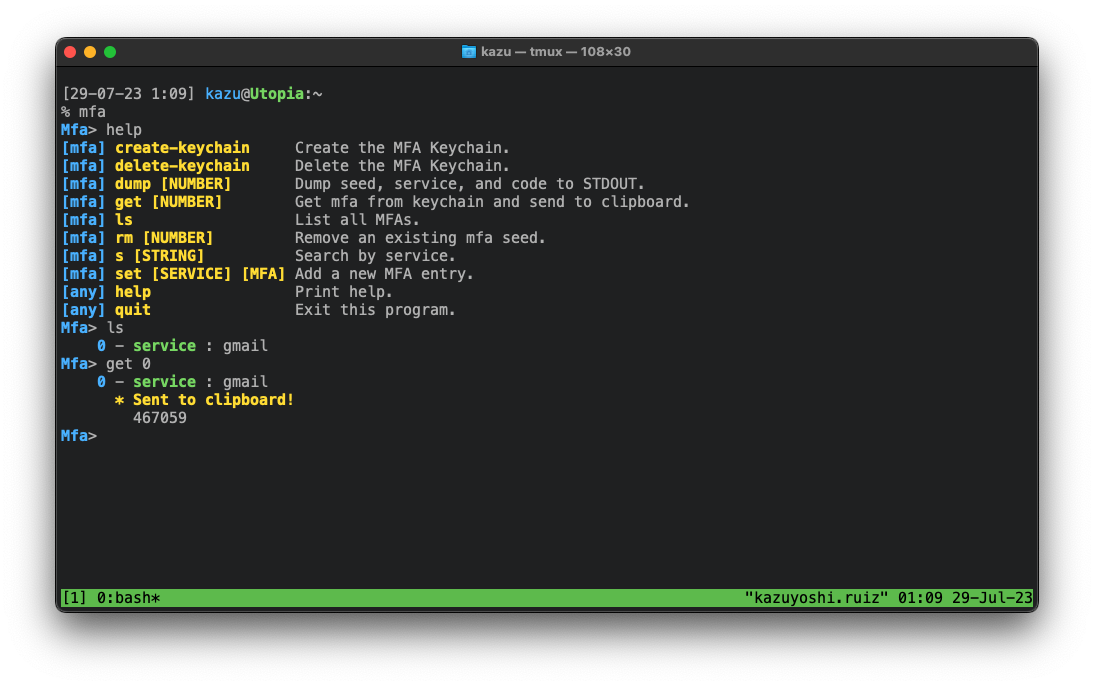

I hope it is useful to you.

Thank you for your time :)